
# Movie Dataset Analysis

In this notebook, we'll analyze a movie dataset to uncover insights about movie performance. We'll explore relationships between movie attributes like budget, ratings, and genres to understand their impact on gross earnings.

## Import Libraries


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Set plot style
sns.set_theme(style='whitegrid')

# Load the dataset
movies_data = pd.read_csv(r"C:\Users\andri\OneDrive\Portfolio\movies.csv")

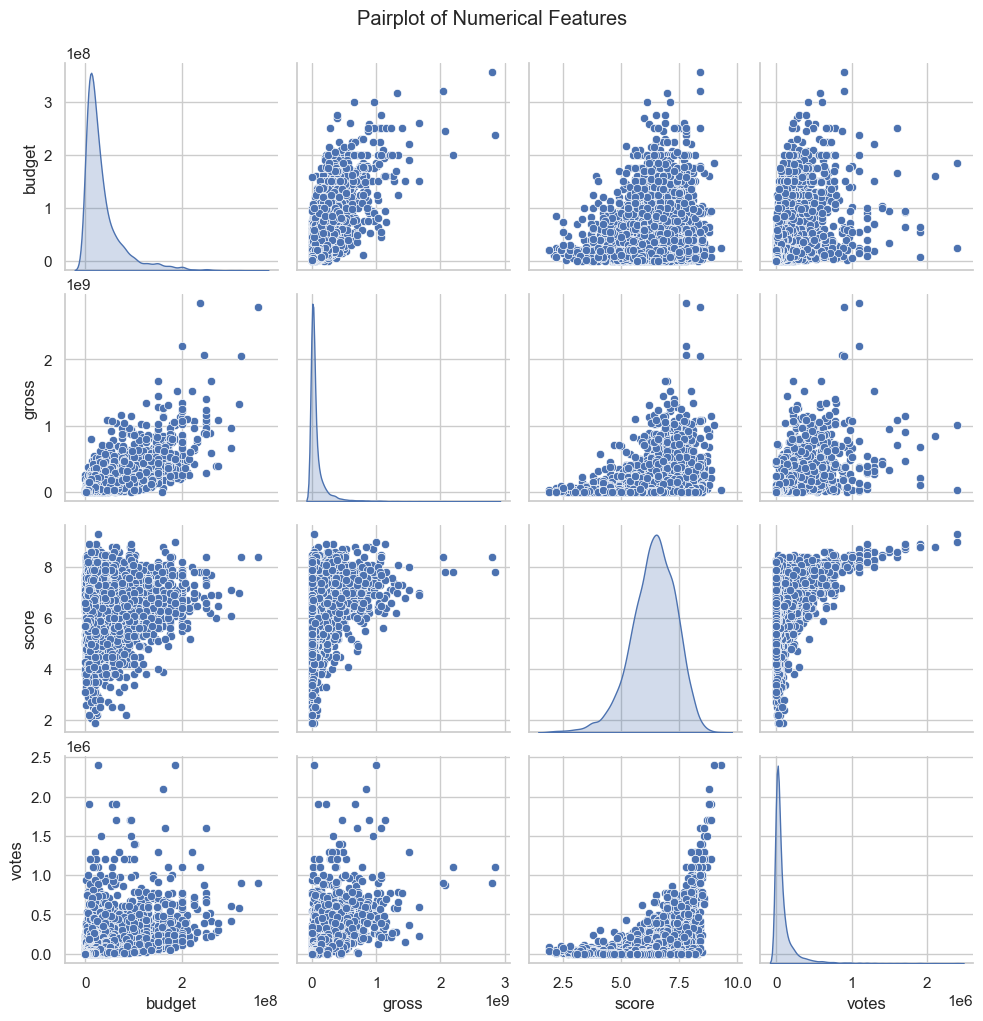

In [3]:

# Exploratory Data Analysis

# Missing values and data types
missing_values = movies_data.isnull().sum()
data_types = movies_data.dtypes
summary_statistics = movies_data.describe()
unique_genre = movies_data['genre'].unique()
unique_rating = movies_data['rating'].unique()

# Pairplot to visualize relationships
sns.pairplot(movies_data[['budget', 'gross', 'score', 'votes']], diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


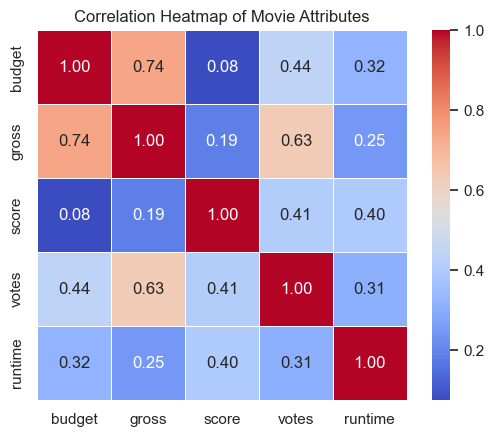

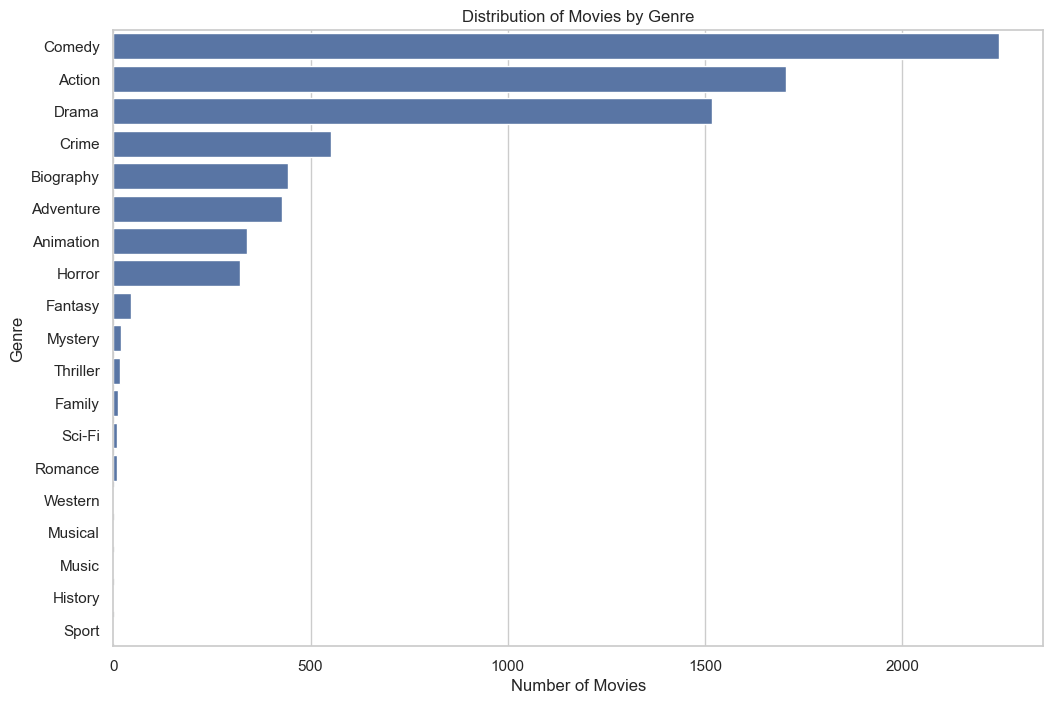

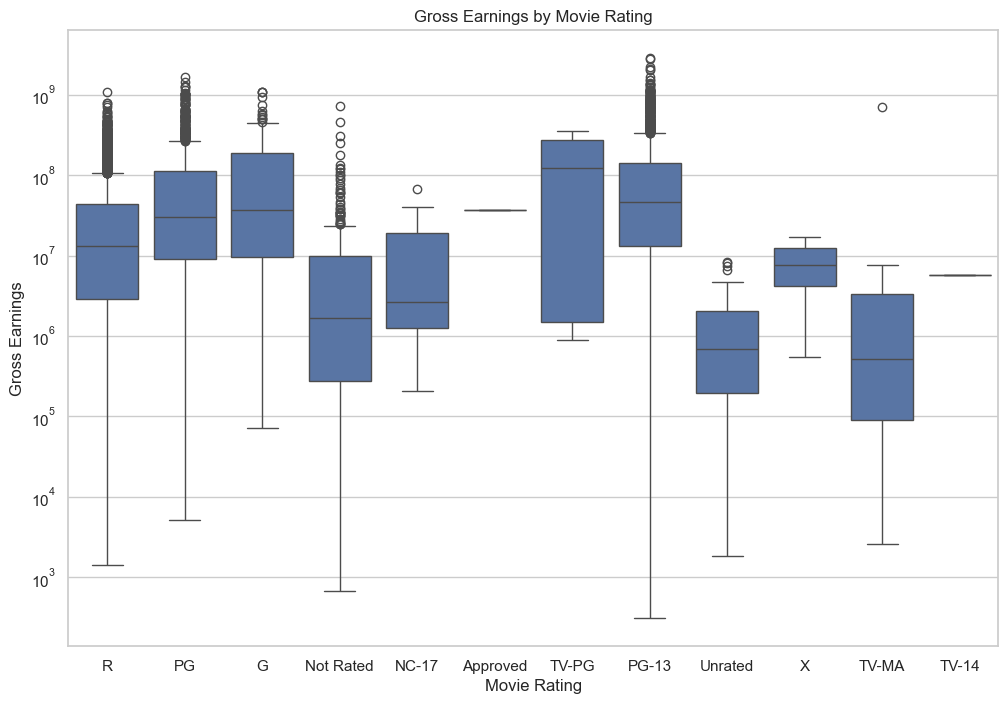

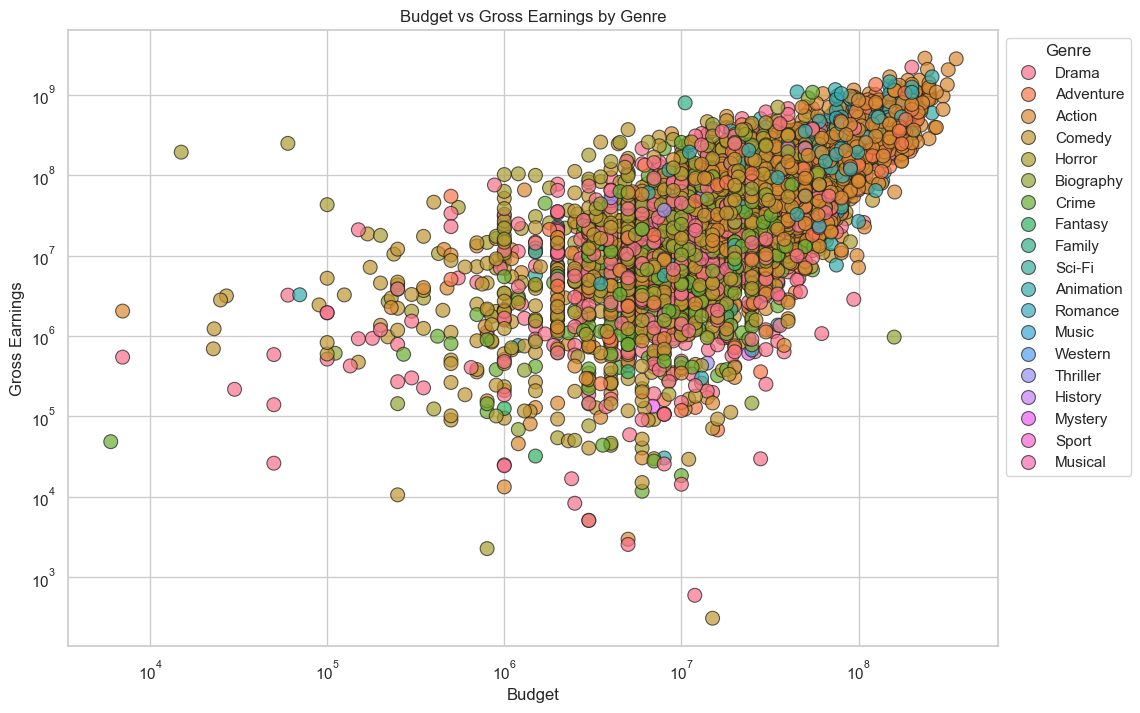

In [6]:

# Visualizations

# Correlation Heatmap
sns.heatmap(movies_data[['budget', 'gross', 'score', 'votes', 'runtime']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Heatmap of Movie Attributes')
plt.show()

# Distribution of movie genres
plt.figure(figsize=(12, 8))
sns.countplot(y='genre', data=movies_data, order=movies_data['genre'].value_counts().index)
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Gross earnings by movie rating
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='gross', data=movies_data)
plt.title('Gross Earnings by Movie Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Gross Earnings')
plt.yscale('log')
plt.show()

# Budget vs Gross by Genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='gross', hue='genre', data=movies_data, s=100, alpha=0.7, edgecolor='k')
plt.title('Budget vs Gross Earnings by Genre')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Genre')
plt.show()


We can see a lof of different things from this graphs:
* The budget and gross earnings are positively correlated, which is expected as movies with higher budgets tend to have higher earnings.
* The number of votes and gross earnings are also positively correlated, which is expected as movies with more votes tend to have higher earnings.
* Comedy, Drama, and Action are by far the most common genres in the movie industry.


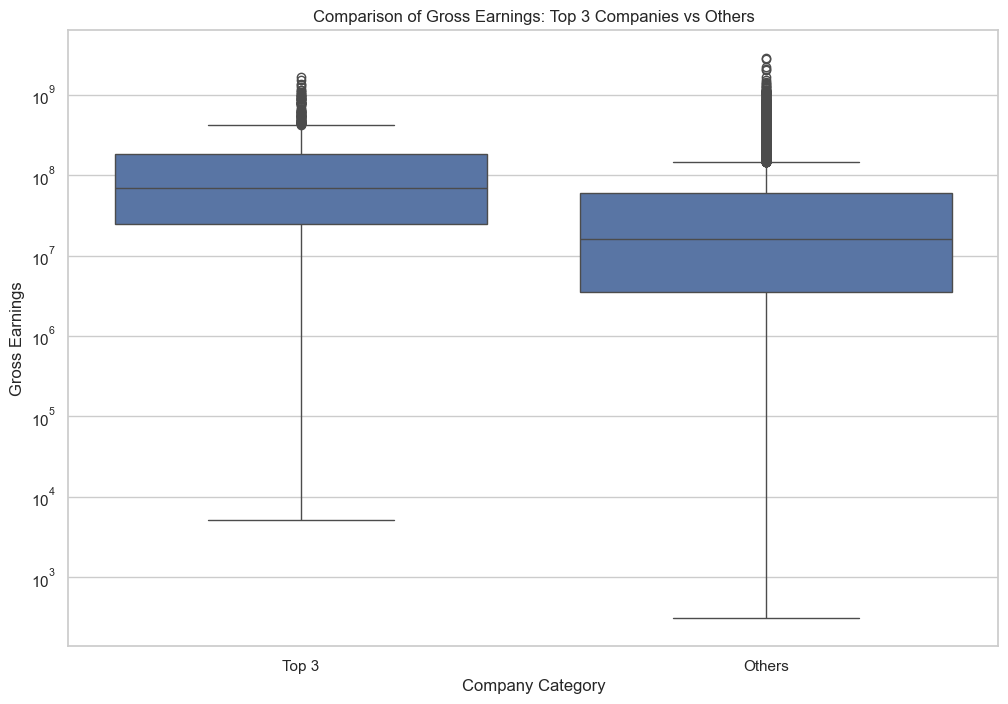

The three biggest companies by gross earnings in the dataset are:
Marvel Studios
Illumination Entertainment
Fairview Entertainment
Top 3 Companies vs Others - T-test: t-statistic = 14.362860751997822, p-value = 3.62786026619412e-46


In [11]:

# Analysis: Do the top three movie companies make higher gross income movies than the others?

# Identify the top three companies by average gross earnings
top_companies = movies_data.groupby('company')['gross'].sum().sort_values(ascending=False).head(3).index

# Create a new column to categorize companies
movies_data['company_category'] = movies_data['company'].apply(lambda x: 'Top 3' if x in top_companies else 'Others')

# Compare gross earnings between the top companies and others
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_category', y='gross', data=movies_data)
plt.title('Comparison of Gross Earnings: Top 3 Companies vs Others')
plt.xlabel('Company Category')
plt.ylabel('Gross Earnings')
plt.yscale('log')
plt.show()

# Statistical test: Top 3 vs Others
top3_gross = movies_data[movies_data['company_category'] == 'Top 3']['gross']
others_gross = movies_data[movies_data['company_category'] == 'Others']['gross']

t_stat, p_val = ttest_ind(top3_gross.dropna(), others_gross.dropna())

print('The three biggest companies by gross earnings in the dataset are:\nMarvel Studios\nIllumination Entertainment\nFairview Entertainment')
print(f"Top 3 Companies vs Others - T-test: t-statistic = {t_stat}, p-value = {p_val}")


The analysis shows that the top three movie companies, identified by average gross earnings, consistently produce movies that earn significantly higher than those produced by other companies. The boxplot comparison reveals a clear distinction in the earnings, with movies from these companies consistently outperforming others. This difference is statistically significant, as confirmed by the T-test with a p-value much less than 0.05, showing that the results are not due to chance.

This insight demonstrates the impact of large studios on movie success, likely due to their significant marketing budgets, access to popular directors and actors, and established distribution networks.

In [ ]:

# Additional Relationships Analysis
# Genre vs Gross Earnings
genre_gross = movies_data.groupby('genre')['gross'].mean().sort_values(ascending=False)

# Rating vs Gross Earnings
rating_gross = movies_data.groupby('rating')['gross'].mean().sort_values(ascending=False)

# Statistical test: Do Action movies have significantly higher gross earnings than Drama?
action_drama_gross = movies_data[movies_data['genre'].isin(['Action', 'Drama'])][['genre', 'gross']]
action_gross = action_drama_gross[action_drama_gross['genre'] == 'Action']['gross']
drama_gross = action_drama_gross[action_drama_gross['genre'] == 'Drama']['gross']

# T-test to compare means
t_stat, p_val = ttest_ind(action_gross.dropna(), drama_gross.dropna())

# Outputs
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)
print("\nSummary Statistics:\n", summary_statistics)
print("\nUnique Genres:\n", unique_genre)
print("\nUnique Ratings:\n", unique_rating)
print("\nGenre vs Gross Earnings:\n", genre_gross)
print("\nRating vs Gross Earnings:\n", rating_gross)
print(f"\nAction vs Drama Earnings T-test: t-statistic = {t_stat}, p-value = {p_val}")


Missing Values:
 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Data Types:
 name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Summary Statistics:
               year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+


### Insights

1. **Genre vs Gross Earnings**
   - Animation and Family genres have the highest average gross earnings.
   - Action, Adventure, and Mystery genres also earn relatively high amounts.
   - Genres like Music, Sport, and Musical have the lowest average earnings.

2. **Rating vs Gross Earnings**
   - Movies rated TV-PG and G have the highest average gross earnings.
   - PG-13 and PG-rated movies also tend to earn more.
   - R-rated movies have moderate earnings, while Unrated movies earn the least.

3. **Action vs Drama Earnings**
   - A t-test comparing Action and Drama movies reveals a significant difference in earnings.
   - Action movies have significantly higher earnings than Drama, with a p-value far below 0.05, meaning the difference is statistically significant.
